**Team Member:**

Rakshitha.M USN:1RVU22BSC079

Sajjani.P USN:1RVU22BSC087

Sumedha V USN:1RVU22BSC101

#**Soil Fertility Prediction: Utilizing Logistic Regression**


# Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
 #reading csv file
df=pd.read_csv("Soil_Fertility.csv")
df. head()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,0
4,270,9.9,444,7.63,0.40,0.86,11.8,0.25,0.76,1.69,2.43,2.26,1


#Data Pre-processing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       880 non-null    int64  
 1   P       880 non-null    float64
 2   K       880 non-null    int64  
 3   pH      880 non-null    float64
 4   EC      880 non-null    float64
 5   OC      880 non-null    float64
 6   S       880 non-null    float64
 7   Zn      880 non-null    float64
 8   Fe      880 non-null    float64
 9   Cu      880 non-null    float64
 10  Mn      880 non-null    float64
 11  B       880 non-null    float64
 12  Output  880 non-null    int64  
dtypes: float64(10), int64(3)
memory usage: 89.5 KB


In [ ]:
df.isna().sum()/len(df)*100


N         0.0
P         0.0
K         0.0
pH        0.0
EC        0.0
OC        0.0
S         0.0
Zn        0.0
Fe        0.0
Cu        0.0
Mn        0.0
B         0.0
Output    0.0
dtype: float64

In [ ]:
df.duplicated().sum()

0

In [ ]:
count=df['Output'].value_counts() #54% and 45%
print(count)

Output
1    479
0    401
Name: count, dtype: int64


#Checking for Outliers

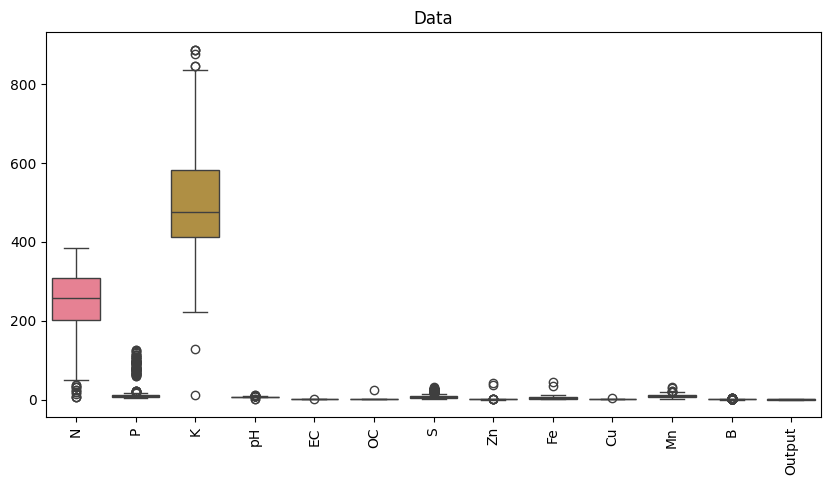

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
sns.boxplot(df)
plt.title('Data')
plt.xticks(rotation=90)
plt.show()

#Performing Correlation_Matrix

In [ ]:
# Calculate correlation coefficients between numeric features and label
correlation_matrix = df.corr()
correlation_with_label = correlation_matrix['Output'].sort_values(ascending=False)
print("Correlation with Label (Output):")
print(correlation_with_label)


Correlation with Label (Output):
Output    1.000000
N         0.729125
P         0.188180
pH        0.061680
K         0.060434
Mn        0.053122
Fe        0.052399
Zn        0.041543
OC        0.037464
EC       -0.019714
B        -0.045461
S        -0.046898
Cu       -0.119174
Name: Output, dtype: float64


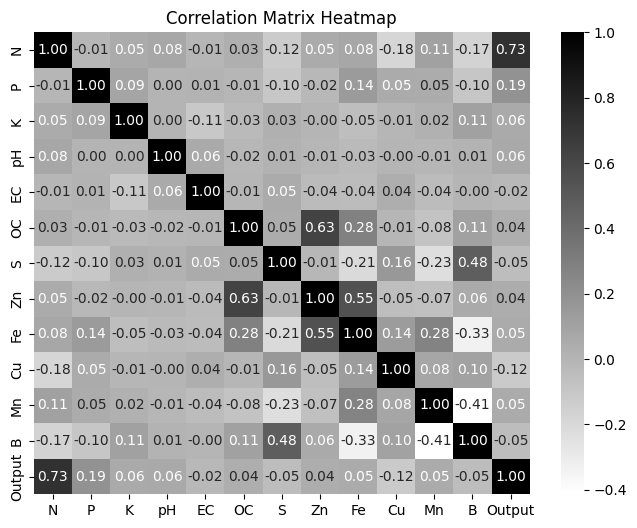

In [ ]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='gray_r', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Scaling


In [ ]:
X = df.iloc[::,:-1]
y = df.iloc[::,-1:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
minmax_data = minmax.fit_transform(X)
minmax_df = pd.DataFrame(minmax_data, columns=X.columns)
minmax_df

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B
0,0.350133,0.046683,0.626712,0.640000,0.611765,0.025105,0.173254,0.004054,0.002284,0.232082,0.278407,0.018116
1,0.549072,0.037674,0.373288,0.655610,0.764706,0.040167,0.815547,0.005485,0.014844,0.494881,0.089997,0.807971
2,0.416446,0.054873,0.807078,0.652683,0.482353,0.042259,0.449934,0.005485,0.014844,0.505119,0.083846,0.713768
3,0.400531,0.031941,0.529680,0.657561,0.564706,0.035146,0.835310,0.006439,0.007536,0.491468,0.082227,0.637681
4,0.700265,0.057330,0.494292,0.656585,0.352941,0.031799,0.367589,0.004293,0.012560,0.546075,0.075105,0.797101
...,...,...,...,...,...,...,...,...,...,...,...,...
875,0.915119,0.063882,0.698630,0.688780,0.482353,0.007950,0.217391,0.006916,0.102306,0.204778,0.353512,0.228261
876,0.684350,0.049959,0.542237,0.618537,0.435294,0.000000,0.108037,0.006678,0.183832,0.122867,0.254775,0.123188
877,0.716180,0.051597,0.409817,0.655610,0.611765,0.016318,0.197628,0.008347,0.076730,0.184300,0.206216,0.094203
878,0.832891,0.089271,0.433790,0.632195,0.647059,0.040586,0.157773,0.012163,0.099794,0.317406,0.425380,0.170290


Balancing the Data

In [ ]:
# Considering the features only which is corelated to the target variables
X=minmax_df[['N','P','K','pH','OC','Zn','Fe','Mn']]  #indepedent variables
y=df['Output'] #dependent variables

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler
ros = RandomUnderSampler()

# Upsample the minority class
X, y = ros.fit_resample(X, y)

#Logistic Regression

In [ ]:
# Select ratio
ratio = 0.80

total_rows = df.shape[0]
train_size = int(total_rows*ratio)

# Split data into test and train
train = df[0:train_size]
test = df[train_size:]

In [ ]:
X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]

X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

In [ ]:
def sigmoid(z):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    """Compute the cost (logistic loss) for logistic regression."""
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

def compute_gradient(X, y, theta):
    """Compute the gradient of the cost function for logistic regression."""
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    gradient = (1 / m) * np.dot(X.T, (h - y))
    return gradient

def update_parameters(theta, gradient, learning_rate):
    """Update the parameters (weights and bias) using gradient descent."""
    theta -= learning_rate * gradient
    return theta

def predict(X, theta):
    """Predict the output given the input features and parameters."""
    return np.round(sigmoid(np.dot(X, theta)))


# Initialize parameters
theta = np.zeros(X_train.shape[1] + 1)  # Initialize weights and bias

# Set hyperparameters
learning_rate = 0.1
iterations = 1000

# Perform gradient descent
for _ in range(iterations):
    # Add bias term to X_train
    X_train_with_bias = np.column_stack((np.ones(X_train.shape[0]), X_train))
    # Compute cost
    cost = compute_cost(X_train_with_bias, y_train, theta)
    # Compute gradient
    gradient = compute_gradient(X_train_with_bias, y_train, theta)
    # Update parameters
    theta = update_parameters(theta, gradient, learning_rate)

<ipython-input-64-fb65cd795a4d>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-fb65cd795a4d>:9: RuntimeWarning: divide by zero encountered in log
  cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-64-fb65cd795a4d>:9: RuntimeWarning: divide by zero encountered in log
  cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-64-fb65cd795a4d>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-fb65cd795a4d>:9: RuntimeWarning: divide by zero encountered in log
  cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-64-fb65cd795a4d>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-64-fb65cd795a4d>:9: RuntimeWarning: divide by zero encountered in log
  cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-64-fb65cd795a4d>:3: RuntimeWarning: overflow e

In [ ]:
# Predict on test data
X_test_with_bias = np.column_stack((np.ones(X_test.shape[0]), X_test))
y_pred_test = predict(X_test_with_bias, theta)

accuracy = np.mean(y_pred_test == y_test)
print("Testing Accuracy:", accuracy)

Testing Accuracy: 0.875


<ipython-input-64-fb65cd795a4d>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


#Evaluation metrix

In [ ]:
#Evaluation Matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)

cr = classification_report(y_test, y_pred_test)
print("\nClassification Report:",)
print (cr)

acc = accuracy_score(y_test, y_pred_test)
print("\nAccuracy:",acc*100)

Confusion Matrix:
[[  7  18]
 [  4 147]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.28      0.39        25
           1       0.89      0.97      0.93       151

    accuracy                           0.88       176
   macro avg       0.76      0.63      0.66       176
weighted avg       0.85      0.88      0.85       176


Accuracy: 87.5


Sk-Learn Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.score(X_test,y_test)

0.9204545454545454

Summary/Observation

**Soil Fertility Prediction utilizing Logistic Regression**

**Dataset Overview:**

The soil fertility dataset comprises 881 samples and 13 features, encompassing various soil properties like nutrient content (N, P, K), soil acidity (pH), electrical conductivity (EC), and presence of essential elements like sulphur (S), zinc (Zn), iron (Fe), copper (Cu), manganese (Mn), and boron (B). Soil samples are categorized into two fertility classes: "Not Fertile" (0) and "Fertile" (1).



**Steps:**

**Data Preprocessing:**
1. Data Check: The dataset was checked for null and duplicate values, ensuring data integrity.
2. Encoding: Since the target variable has two classes, label encoding was applied, assigning numerical values to each class.
3. Scaling: Min-max scaling was performed on numeric features to bring them within a fixed range (0-1), aiding model convergence and performance.

Model Selection:
Logistic Regression was chosen as the classification algorithm due to its suitability for binary classification tasks like soil fertility prediction.

**Observations:**

- Data Quality: The dataset exhibited no null or duplicate values, ensuring integrity.
- Feature Scaling: Min-max scaling was crucial for logistic regression, enhancing convergence.
- Data Split: The dataset was divided into 80% training and 20% testing data to train and evaluate the model's performance.
- Model Performance: The initial hand-built logistic regression model achieved an accuracy of 82%, which improved to 87% after
 hyperparameter tuning (e.g., increasing iterations). Using the Sklearn implementation of logistic regression yielded a higher accuracy of 92%.

**Conclusion:**

The logistic regression model achieved a high accuracy of 92%, showcasing its potential in forecasting soil fertility. With proper data
preprocessing and model selection, it proves valuable for soil management and agricultural decision-making. Future enhancements may involve
feature augmentation or alternative classification methods.